In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
cat = cv2.imread("./images/cat.3.jpg")
cat = cv2.merge(list(cv2.split(cat))[::-1])

In [3]:
dog = cv2.imread("./images/dog.3.jpg")
dog = cv2.merge(list(cv2.split(dog))[::-1])

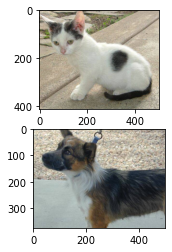

In [4]:
plt.subplot(2,1,1)
plt.imshow(cat)
plt.subplot(2,1,2)
plt.imshow(dog)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
dog.shape,cat.shape

((375, 499, 3), (414, 500, 3))

In [6]:
dog = cv2.resize(dog,(500,414))

In [28]:
dog.shape

(414, 500, 3)

In [29]:
dog

array([[[225, 236, 230],
        [223, 234, 228],
        [221, 232, 226],
        ...,
        [182, 172, 162],
        [174, 161, 152],
        [162, 149, 140]],

       [[218, 229, 223],
        [216, 227, 221],
        [214, 225, 219],
        ...,
        [164, 155, 146],
        [158, 147, 138],
        [150, 140, 131]],

       [[226, 237, 231],
        [224, 235, 229],
        [221, 232, 226],
        ...,
        [157, 151, 144],
        [152, 146, 141],
        [149, 142, 137]],

       ...,

       [[156, 167, 169],
        [159, 170, 172],
        [159, 170, 172],
        ...,
        [152, 163, 165],
        [152, 164, 166],
        [153, 165, 167]],

       [[156, 167, 169],
        [160, 171, 173],
        [160, 171, 173],
        ...,
        [155, 165, 168],
        [156, 167, 169],
        [157, 168, 170]],

       [[157, 168, 170],
        [161, 172, 174],
        [161, 172, 174],
        ...,
        [159, 170, 172],
        [160, 171, 173],
        [162, 173, 175]]

In [8]:
meger_img = cv2.addWeighted(cat,0.6,dog,0.4,0)

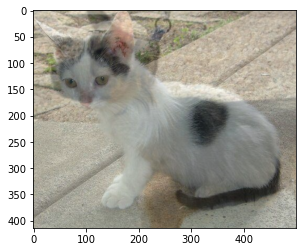

In [9]:
plt.imshow(meger_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
meger_img.shape

(414, 500, 3)

In [11]:
# 图像边缘填充
up = 50
down = 50
left = 50
right = 50

In [12]:
reshape1 = cv2.copyMakeBorder(cat,up,down,left,right,cv2.BORDER_REFLECT) # 反射
reshape2 = cv2.copyMakeBorder(cat,up,down,left,right,cv2.BORDER_CONSTANT,value = 0)
reshape3 = cv2.copyMakeBorder(cat,up,down,left,right,cv2.BORDER_WRAP)
reshape4 = cv2.copyMakeBorder(cat,up,down,left,right,cv2.BORDER_DEFAULT)
reshape5 = cv2.copyMakeBorder(cat,up,down,left,right,cv2.BORDER_REFLECT101)

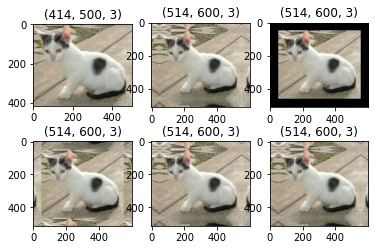

In [13]:
images = [cat,reshape1,reshape2,reshape3,reshape4,reshape5]
for i in range(6):
    if i == 0:
        plt.subplot(2,3,i+1)
        plt.imshow(images[i])
        plt.title(images[i].shape)
    else:
        plt.subplot(2,3,i+1)
        plt.imshow(images[i])
        plt.title(images[i].shape)
        
    
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
fc = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [34]:
fc1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

In [15]:
temp = cv2.copyMakeBorder(cat,1,1,1,1,cv2.BORDER_CONSTANT,value = 0)

In [16]:
r,g,b = cv2.split(temp)

In [17]:
r.shape

(416, 502)

In [18]:
def change(image,fc):
    new_img = np.zeros([414,500])
    for i in range(len(image)-3):
        for j in range(len(image[0])-3):
            t = image[i:i+3,j:j+3]
            new_img[i][j] = abs(np.sum(np.array(t)*fc))%256
            if new_img[i][j] >255 or new_img[i][j]<0 :
                print(i,j)
                print(new_img[i][j])
    return new_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


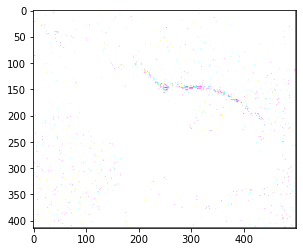

In [37]:
R = change(r,fc1)
G = change(g,fc1)
B = change(b,fc1)

R = change(r,fc)
G = change(g,fc)
B = change(b,fc)
# B = np.zeros([414,500])
# G = np.zeros([414,500])
new_img = np.zeros([414,500,3])
new_img[:,:,0] = R
new_img[:,:,1] = G
new_img[:,:,2] = B

chanels = [R,G,B]
# for i in range(len(chanels)):
#     plt.subplot(1,3,i+1)
#     plt.imshow(chanels[i])
# # plt.imshow(cv2.merge([R,G,B]))
plt.imshow(new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()